In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""Create df containing all data of Hotels"""

#read csv into pandas dataframe
df = pd.read_csv('Hotel_Reviews.csv')


#combine reviews into one column 'all_reviews'
df["all_reviews"] = df['Negative_Review'].str.cat(df['Positive_Review'],sep=" ")
group_hotel = df.groupby(['Hotel_Name', 'Hotel_Address', 'Average_Score'])['all_reviews'].apply(' '.join).reset_index()


#extact city name from address and add a column of hotel city
cities = 'London|Paris|Amsterdam|Vienna|Barcelona|Milan'

cityList = []
for cell in group_hotel['Hotel_Address']:
    match = re.search(cities, cell, re.I)
    cityList.append(match.group())

group_hotel['Hotel_City'] = cityList


#show a few rows of new dataframe
group_hotel

,Hotel_Name,Hotel_Address,Average_Score,all_reviews,Hotel_City
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,8.7,Thought the prise of drinks at the bar a litt...,London
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,7.7,Air conditioning in room didn t work and desp...,Paris
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,8.8,Breakfast not included and buffet really expe...,Vienna
3,41,41 Buckingham Palace Road Westminster Borough ...,9.6,There wasn t a thing that we didn t like It...,London
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,9.4,More kinds of fruit juice will make the mini ...,London
5,88 Studios,88 Holland Road Kensington and Chelsea London ...,8.4,Maybe more selection of tea coffee hot chocol...,London
6,9Hotel Republique,7 9 Rue Pierre Chausson 10th arr 75010 Paris F...,8.8,The room was very small but maybe reasonable ...,Paris
7,A La Villa Madame,44 Rue Madame 6th arr 75006 Paris France,8.8,No Negative The bed was extra comfy the stree...,Paris
8,ABaC Restaurant Hotel Barcelona GL Monumento,Avenida Tibidabo 1 Sarri St Gervasi 08022 Barc...,8.8,The room looks nice in the pictures with the ...,Barcelona
9,AC Hotel Barcelona Forum a Marriott Lifestyle ...,Paseo Taulat 278 Sant Mart 08019 Barcelona Spain,8.1,no tea and coffee facilities in the room this...,Barcelona


In [7]:
""" List of all cities """
print(f"All cities: {group_hotel['Hotel_City'].unique()}")

All cities: ['London' 'Paris' 'Vienna' 'Barcelona' 'Milan' 'Amsterdam']


In [4]:
""" Check hotels of a specific city """
city = 'London'


#filter dataframe by hotel city .reset_index(drop=True) is optional
cityDataframe = group_hotel[group_hotel['Hotel_City']==city].reset_index(drop=True)


cityDataframe

,Hotel_Name,Hotel_Address,Average_Score,all_reviews,Hotel_City
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,8.7,Thought the prise of drinks at the bar a litt...,London
1,41,41 Buckingham Palace Road Westminster Borough ...,9.6,There wasn t a thing that we didn t like It...,London
2,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,9.4,More kinds of fruit juice will make the mini ...,London
3,88 Studios,88 Holland Road Kensington and Chelsea London ...,8.4,Maybe more selection of tea coffee hot chocol...,London
4,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,8.6,Everything comes with a price tag There was n...,London
5,Adria Boutique Hotel,88 Queens Gate Kensington and Chelsea London S...,8.8,We stayed here a year ago and were very happy...,London
6,Aloft London Excel,One Eastern Gateway Royal Victoria Dock Newham...,8.7,Changing rooms in pool are broken Disappointe...,London
7,Amba Hotel Charing Cross,The Strand Westminster Borough London WC2N 5HX...,9.3,Everything was wonderful except some of the r...,London
8,Amba Hotel Marble Arch,Bryanston Street Marble Arch Westminster Borou...,8.5,While Do Not Disturb sign was on with my baby...,London
9,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,7.9,It was too warm for us with the thick douvet ...,London


In [5]:
""" Extract meaning (dimensionality reduction) of 'all reviews' using PCA with 2 PC """

#add more stop words based on the dataset
useless_words = text.ENGLISH_STOP_WORDS.union(["room","rooms","run","st","couldn","location","wasn","hotel","stayed","place","best","positive","negative","time","big","minutes","did","day","didn","near","area","staff","city","close","free","service","really","like","stay","bed","beds","bit","es","just","little","night"])

# for each hotel, the 'all_reviews' cell is changed to a row of terms corresponding to all terms in all rows of 'all_reviews'
vectorizer = TfidfVectorizer(stop_words=useless_words, use_idf=True, smooth_idf=True) #create vectorizer function which make useful words into tokens
tfidfMatrix = vectorizer.fit_transform(cityDataframe['all_reviews'])   #create a (hotel,term) matrix


# Standardizing the features
standard_tfidfMatrix = StandardScaler().fit_transform(tfidfMatrix.toarray())

# reduce to 2 Dimensions
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standard_tfidfMatrix)

# save the result in a dataframe
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-2.766951,-2.160327
1,-3.820788,-2.464757
2,-3.780802,-3.122108
3,-1.529459,-1.206533
4,-2.299152,-1.456723
5,-2.544543,-2.204429
6,0.013005,-0.745724
7,-2.821401,-1.104656
8,-0.862009,3.706021
9,-0.704140,-1.640616


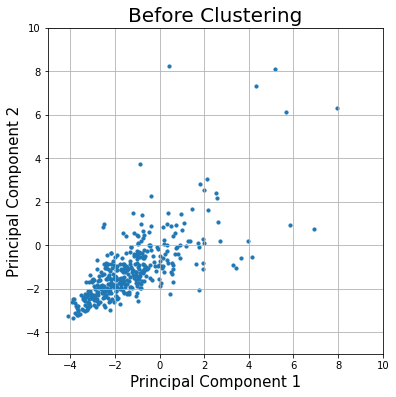

In [7]:
""" plot the principalDf """

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Before Clustering', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], s = 10)
ax.grid()

plt.show()

In [9]:
""" k means """



# k is determined by elbow curve
k = 11



#add more stop words based on the dataset
useless_words = text.ENGLISH_STOP_WORDS.union(["room","rooms","run","st","couldn","location","wasn","hotel","stayed","place","best","positive","negative","time","big","minutes","did","day","didn","near","area","staff","city","close","free","service","really","like","stay","bed","beds","bit","es","just","little","night"])

# for each hotel, the 'all_reviews' cell is changed to a row of terms corresponding to all terms in all rows of 'all_reviews'
vectorizer = TfidfVectorizer(stop_words=useless_words, use_idf=True, smooth_idf=True) #create vectorizer function which make useful words into tokens
tfidfMatrix = vectorizer.fit_transform(cityDataframe['all_reviews'])   #create a (hotel,term) matrix




#'all_reviews' are clustered based on the terms contained
model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=1)
fitted = model.fit(tfidfMatrix)

#each row of 'all_reviews' is assigned a cluster label from 0 to k-1
clusters = model.labels_.tolist()

In [10]:
#add a column of clusters indicating which cluster each hotel belongs
cityDataframe['Clusters'] = clusters

cityDataframe

,Hotel_Name,Hotel_Address,Average_Score,all_reviews,Hotel_City,Clusters
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,8.7,Thought the prise of drinks at the bar a litt...,London,5
1,41,41 Buckingham Palace Road Westminster Borough ...,9.6,There wasn t a thing that we didn t like It...,London,3
2,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,9.4,More kinds of fruit juice will make the mini ...,London,4
3,88 Studios,88 Holland Road Kensington and Chelsea London ...,8.4,Maybe more selection of tea coffee hot chocol...,London,9
4,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,8.6,Everything comes with a price tag There was n...,London,4
5,Adria Boutique Hotel,88 Queens Gate Kensington and Chelsea London S...,8.8,We stayed here a year ago and were very happy...,London,1
6,Aloft London Excel,One Eastern Gateway Royal Victoria Dock Newham...,8.7,Changing rooms in pool are broken Disappointe...,London,6
7,Amba Hotel Charing Cross,The Strand Westminster Borough London WC2N 5HX...,9.3,Everything was wonderful except some of the r...,London,5
8,Amba Hotel Marble Arch,Bryanston Street Marble Arch Westminster Borou...,8.5,While Do Not Disturb sign was on with my baby...,London,2
9,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,7.9,It was too warm for us with the thick douvet ...,London,2


In [11]:
principalDf['Clusters'] = clusters
principalDf

,principal component 1,principal component 2,Clusters
0,-2.766951,-2.160327,5
1,-3.820788,-2.464757,3
2,-3.780802,-3.122108,4
3,-1.529459,-1.206533,9
4,-2.299152,-1.456723,4
5,-2.544543,-2.204429,1
6,0.013005,-0.745724,6
7,-2.821401,-1.104656,5
8,-0.862009,3.706021,2
9,-0.704140,-1.640616,2


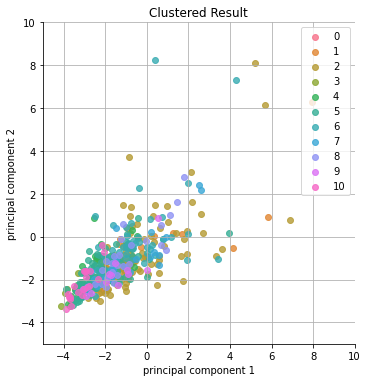

In [14]:
# Use the 'hue' argument to provide a factor variable
pic = sns.lmplot( x='principal component 1', y='principal component 2', data=principalDf, fit_reg=False, hue='Clusters', legend=False)
pic.set(xlim=(-5,10))
pic.set(ylim=(-5, 10))
pic.set(title='Clustered Result')

# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.grid()

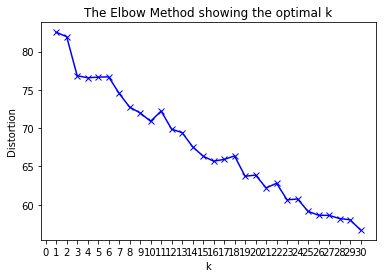

In [105]:
"""elbow method (Sum of squared distances of samples to their closest cluster center.)"""


#sort cluster centers by proximity to centroid
#argsort gives the index of the elements in a list after sorting, -1 means sorting in descending order
order_centroids = model.cluster_centers_.argsort()[:, ::-1] 

terms = vectorizer.get_feature_names()


K = range (1,31)

distortions = []
for kvalue in K:
    kmodel = KMeans(n_clusters=kvalue, init='k-means++', max_iter=300, n_init=1)
    kmodel = kmodel.fit(tfidfMatrix)
    distortions.append(kmodel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.xticks( np.arange(max(K)+1) )
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
"""showing the results"""


#sort cluster centers by proximity to centroid
#argsort gives the index of the elements in a list after sorting, -1 means sorting in descending order
order_centroids = model.cluster_centers_.argsort()[:, ::-1] 

terms = vectorizer.get_feature_names()


for i in range(k):      #for each cluster
#     print("Cluster %d hotels:" % i)
#     names = cityDataframe[cityDataframe['Clusters']==i]['Hotel_Name']
#     print(names)
    
    print("Cluster %d top 10 words:" % i),
    for index in order_centroids[i, :20]:   #for each value(index) of this cluster's first 1o values
        print(' %s' % terms[index]),
    print()
    print()

Cluster 0 top 10 words:
 clean
 good
 bush
 small
 great
 station
 tube
 nice
 friendly
 westfield
 comfortable
 bathroom
 helpful
 shower
 shepherds
 noise
 modern
 noisy
 wifi
 road


Cluster 1 top 10 words:
 great
 good
 breakfast
 friendly
 helpful
 excellent
 comfortable
 nice
 clean
 small
 london
 lovely
 bar
 bathroom
 shower
 perfect
 quiet
 comfy
 food
 restaurant


Cluster 2 top 10 words:
 great
 bar
 rooftop
 breakfast
 good
 roof
 excellent
 friendly
 helpful
 pool
 lovely
 terrace
 nice
 amazing
 comfortable
 london
 food
 restaurant
 bathroom
 fantastic


Cluster 3 top 10 words:
 small
 good
 great
 breakfast
 friendly
 helpful
 clean
 nice
 bathroom
 excellent
 comfortable
 london
 shower
 street
 reception
 oxford
 lovely
 size
 perfect
 tiny


Cluster 4 top 10 words:
 good
 small
 paddington
 breakfast
 friendly
 great
 clean
 helpful
 station
 nice
 comfortable
 bathroom
 hyde
 excellent
 park
 shower
 london
 reception
 lovely
 tube


Cluster 5 top 10 words:
 breakf

In [109]:
""" save result in pandas dataframes """

#create disctionary of {cluster_i: hotel names}
d={}
for i in range(k):      #for each cluster
    names = cityDataframe[cityDataframe['Clusters']==i]['Hotel_Name']
    d['Cluster'+str(i)]=names.values

    
# create dataframe
save = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in d.items()]))

# pickle the dataframe
save.to_pickle("./Milan_16Clusters.pkl")

# to read the picked datarframe, uncomment the following, change file path accordingly
# loadedDF = pd.read_pickle("./London_4Clusters.pkl")

In [16]:
"""
for a given hotel name, show all other hotels that are in the same cluster 
(doesn't include the given hotel itself)
"""

clusterLabelOfOneHotel = cityDataframe.loc[cityDataframe['Hotel_Name']=='Avo Hotel', 'Clusters']
cityDataframe[(cityDataframe['Clusters']==clusterLabelOfOneHotel.iloc[0]) & (cityDataframe['Hotel_Name'] != 'Avo Hotel')]['Hotel_Name']

0                                     11 Cadogan Gardens
7                               Amba Hotel Charing Cross
10                         Andaz London Liverpool Street
11                             Apex City Of London Hotel
12                                Apex London Wall Hotel
13                               Apex Temple Court Hotel
36                              COMO Metropolitan London
46              Club Quarters Hotel Lincoln s Inn Fields
47                         Club Quarters Hotel St Paul s
48                  Club Quarters Hotel Trafalgar Square
51                                Conrad London St James
57                                   Covent Garden Hotel
66                                   Dorset Square Hotel
81                                        Draycott Hotel
82                                           Dukes Hotel
83                                        Durrants Hotel
84                                Eccleston Square Hotel
86                             

In [17]:
""" Show the number of hotels per cluster """
cityDataframe['Clusters'].value_counts()

2     122
5      86
6      51
4      29
8      25
1      23
7      22
10     19
9      13
3       9
0       1
Name: Clusters, dtype: int64

In [18]:
"""median score of each cluster"""

scoreGroupbyCluster = cityDataframe['Average_Score'].groupby(cityDataframe['Clusters'])

scoreGroupbyCluster.median()#.loc[2]

Clusters
0     8.70
1     8.20
2     8.20
3     9.40
4     9.10
5     8.85
6     8.60
7     7.95
8     8.40
9     8.40
10    9.30
Name: Average_Score, dtype: float64

In [36]:
"""find all hotels that is in cluster 2"""

cityDataframe.query('Clusters==2')['Hotel_Name']

0                                     11 Cadogan Gardens
1                                                     41
2                     45 Park Lane Dorchester Collection
4                            Ace Hotel London Shoreditch
6                                     Aloft London Excel
7                               Amba Hotel Charing Cross
10                         Andaz London Liverpool Street
19     Baglioni Hotel London The Leading Hotels of th...
20                                       Batty Langley s
21                                        Bentley London
31                                          Blakes Hotel
33                                 Boundary Rooms Suites
35                                  Bulgari Hotel London
36                              COMO Metropolitan London
37                                       COMO The Halkin
39                          Canary Riverside Plaza Hotel
40                                Charlotte Street Hotel
42                             